<a href="https://colab.research.google.com/github/Priesemann-Group/covid19_research/blob/master/data_exploration/data_exploration_germany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import datetime
import pandas as pd

#If module is not found, downloads it to root folder (ignored by git)
try: 
    import covid19_inference as cov19
except ModuleNotFoundError:
    
    try:
        sys.path.append('../covid19_inference-model_cleanup')
        import covid19_inference as cov19
        
    except ModuleNotFoundError:
        url_repo = "https://github.com/Priesemann-Group/covid19_inference/archive/model_cleanup.zip"

        import requests, zipfile, io
        r = requests.get(url_repo)
        z = zipfile.ZipFile(io.BytesIO(r.content))
        z.extractall(path="..")
        sys.path.append('../covid19_inference-model_cleanup')
        import covid19_inference as cov19

## New cases: JHU, RKI, ECDC

INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded data from local
INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded data from local
INFO     [covid19_inference.data_retrieval._JHU] Successfully loaded data from local
INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded data from local


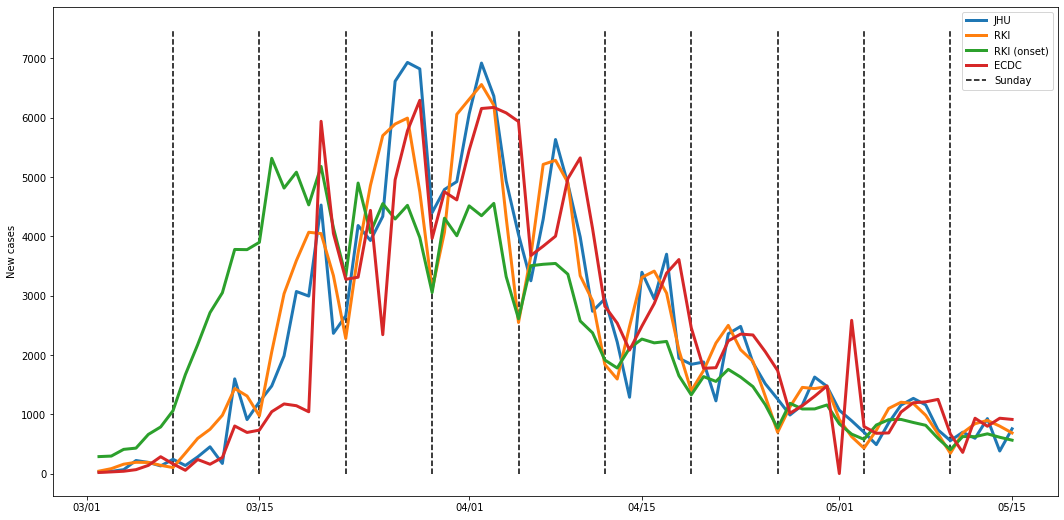

In [2]:
#Data dates
bd = datetime.datetime(2020,3,2)
ed = datetime.datetime(2020,5,15)

#Gets sundays in date range
date_range = pd.date_range(bd, ed)
sundays = date_range[date_range.weekday == 6]

#Downloads data from built-in sources
data_type = 'confirmed'
new_cases_rki = cov19.data_retrieval.RKI(True).get_new(value="confirmed", data_begin=bd, data_end=ed)
new_cases_rki_ref = cov19.data_retrieval.RKI(True).get_new(value="confirmed", data_begin=bd, data_end=ed, date_type='date_ref')
new_cases_jhu = cov19.data_retrieval.JHU(True).get_new(value='confirmed', country='Germany', data_begin=bd, data_end=ed)
new_cases_owd = cov19.data_retrieval.OWD(True).get_new(value='confirmed', country='Germany', data_begin=bd, data_end=ed)

# #ECDC (identical to OWD)
# url_csv = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
# ecdc_data = pd.read_csv(url_csv)
# ecdc_data['date'] = pd.to_datetime(ecdc_data['dateRep'], dayfirst=True)
# ecdc_data.sort_values('date', inplace=True)
# new_cases_ecdc = ecdc_data[ecdc_data.countriesAndTerritories=='Germany'].set_index('date')['cases'][bd:ed]

# #EPI-curve
# epi_curve = [7, 9, 9, 10, 33, 19, 27, 45, 65, 101, 149, 158, 203, 183, 207, 279, 269, 364, 381, 601, 763, 1038, 1573, 2025, 2531, 2793, 3411, 3448, 3591, 4744, 3957, 4095, 3514, 4135, 3330, 2775, 3983, 2943, 3218, 2852, 2942, 2754, 2221, 3166, 2322, 2751, 2454, 2496, 1983, 1769, 2279, 1910, 1786, 1709, 1440, 1211, 1240, 1179, 1209, 1152, 1022, 969, 855, 740, 937, 738, 706, 710, 628, 539, 474, 655, 485, 441, 510, 393, 364, 379, 488, 386, 352, 333, 291, 263, 236, 280, 255, 204, 178, 173, 138, 90, 93, 29, 6, 1]
# new_cases_epi = pd.DataFrame(epi_curve, index=pd.date_range('2020-02-16',periods=96))[bd:ed]

# #Matthias Linden
# est_onset_of_illness = [0.0,0.0,0.7,2.7,5.1,7.3,9.7,11.8,14.2,19.3,25.9,31.5,38.2,48.2,61.2,76.9,96.4,121.4,154.2,198.2,257.6,338.9,451.6,609.2,826.0,1110.2,1465.1,1885.5,2348.6,2821.8,3280.2,3692.7,4017.7,4215.1,4272.9,4216.4,4086.3,3913.8,3719.4,3535.1,3387.1,3272.3,3173.0,3076.2,2978.7,2879.9,2791.7,2732.2,2696.0,2652.9,2572.1,2446.1,2291.5,2139.1,2008.1,1888.4,1758.0,1613.8,1474.1,1355.3,1260.2,1184.8,1125.2,1073.4,1019.0,957.7,891.9,827.8,770.8,722.4,680.3,640.5,600.7,561.1,524.9,495.2,473.0,457.3,445.5,434.6,423.6,411.5,396.9,380.2,362.9,346.4,331.4,318.8,308.7,301.3,296.5,293.8,292.2,291.0,289.0,286.0,282.1,278.0,273.9,270.1,266.5,263.0]
# new_cases_est_ml = pd.DataFrame(est_onset_of_illness, index=pd.date_range('2020-02-12',periods=102))[bd:ed]

plt.figure(figsize=(18,9))
plt.plot(new_cases_jhu, label='JHU', lw=3)
plt.plot(new_cases_rki, label='RKI', lw=3)
plt.plot(new_cases_rki_ref, label='RKI (onset)', lw=3)
plt.plot(new_cases_owd, label='ECDC', lw=3)
# plt.plot(new_cases_epi, label='Epi-curve', lw=3)
# plt.plot(new_cases_est_ml, label='Onset Matthias', lw=3)
plt.vlines(sundays, ymin=0, ymax=7500, linestyles='dashed', label='Sunday')
plt.legend()

plt.ylabel('New cases')
plt.legend()
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m/%d'))